# Exploratory Data Analysis Starter

## Import packages

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. 

In [3]:
client_df = pd.read_csv('./client_data.csv')
price_df = pd.read_csv('./price_data.csv')

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [4]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [5]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types  dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [6]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [7]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [8]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [9]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


---

# Data visualization

## Overall churn v/s retention rate

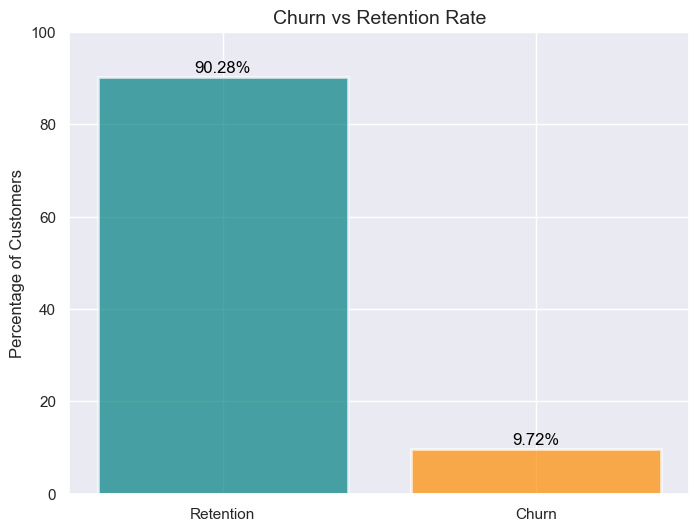

In [115]:
churn_summary = client_df['churn'].value_counts(normalize=True) * 100  
churn_summary.index = ['Retention', 'Churn']  

# Visualization
plt.figure(figsize=(8, 6))
plt.bar(
    churn_summary.index, 
    churn_summary.values, 
    color=['teal', 'darkorange'],  
    edgecolor='white',  
    linewidth=2, 
    alpha=0.7 
)
plt.title("Churn vs Retention Rate", fontsize=14)
plt.ylabel("Percentage of Customers", fontsize=12)
plt.ylim(0, 100)

for i, val in enumerate(churn_summary.values):
    plt.text(i, val + 1, f'{val:.2f}%', ha='center', fontsize=12, color='black')

# Display the plot
plt.show()

## Channel Analysis
### Retention Vs Churn Rates by Sales Channel
Here we will try to understand the churn rates across different sales channels and identify the best-performing channels in terms of retention.

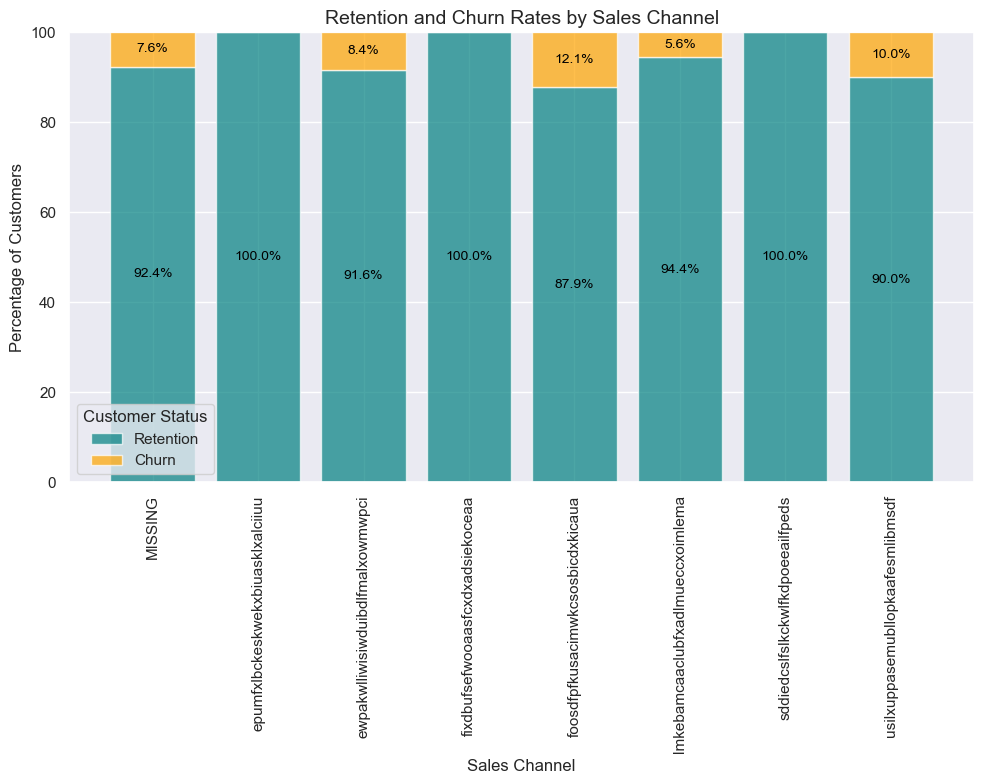

In [116]:

grouped = client_df.groupby(['channel_sales', 'churn'])['id'].count().unstack(fill_value=0)

# Calculate percentages
grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Plotting
plt.figure(figsize=(10, 8))
bar1 = plt.bar(grouped_percentage.index, grouped_percentage[0], color='teal', edgecolor='white', label='Retention', alpha=0.7)
bar2 = plt.bar(grouped_percentage.index, grouped_percentage[1], bottom=grouped_percentage[0], color='orange', edgecolor='white', label='Churn', alpha=0.7)


plt.title("Retention and Churn Rates by Sales Channel", fontsize=14)
plt.ylabel("Percentage of Customers", fontsize=12)
plt.xlabel("Sales Channel", fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0, 100)
plt.legend(title="Customer Status")


for bar_group in [bar1, bar2]:
    for bar in bar_group:
        height = bar.get_height()
        if height > 0: 
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2,
                     f'{height:.1f}%', ha='center', va='center', fontsize=10, color='black')

# Show plot
plt.tight_layout()
plt.show()

- The sales channels epumrfxblceskwexbiusakklaciuiiu, lnkebamcaubfxadlnuecxxoinlema, and sdiedcslfsklcwkflkpoeealrjpeds have a 100% retention rate and 0% churn rate.

- The sales channel fixoburfsiewooasixckxadsiekicoeaa has the highest churn rate at 12.1%.

- The sales channel foostgfkusacmivkcsobsidkxkcaua has the lowest churn rate among those with non-zero churn at 5.6%.

### Visualizing just the churn rates

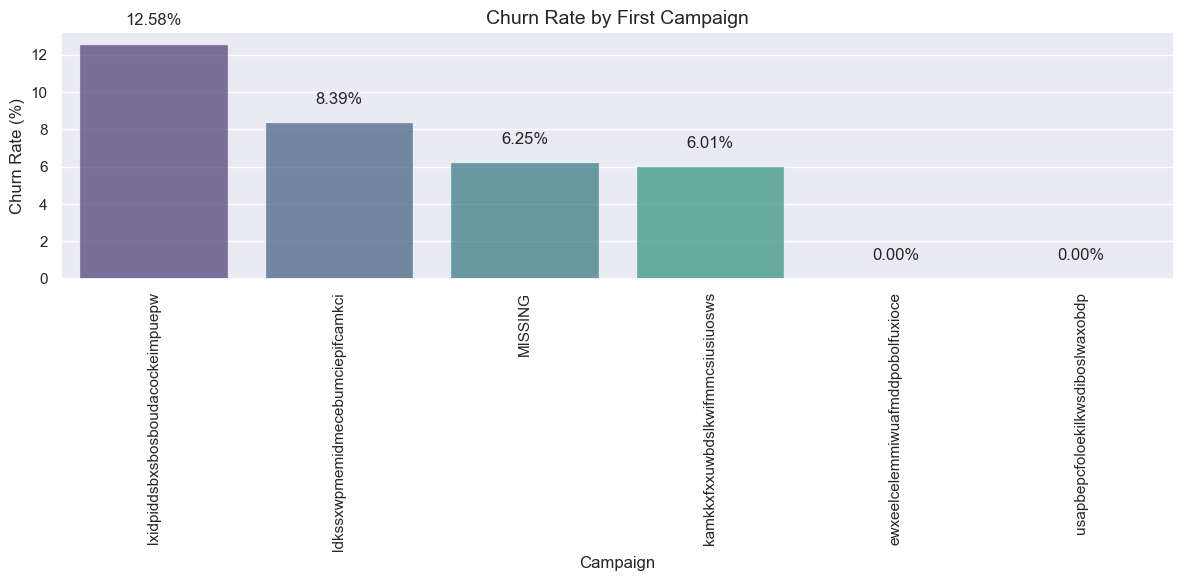

In [87]:
# Plot the churn rate
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=campaign_churn.index, y=campaign_churn['churn_rate'], palette='viridis', alpha=0.7)


for index, value in enumerate(campaign_churn['churn_rate']):
    ax.text(index, value + 1, f'{value:.2f}%', ha='center', fontsize=12)

plt.title("Churn Rate by First Campaign", fontsize=14)
plt.xlabel("Campaign", fontsize=12)
plt.ylabel("Churn Rate (%)", fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


- "lxkpidodsxbosboudacokcimpuqepw" with a churn rate of 12.58% is the highest
- "ewxecelemmmiwufnddpobofuxioce" and "usapbepciioekflikwsdiboswaxobdp" with a churn rate of 0.00% being the least

## Analyzing the changes in the price
### Visualize price distributions by churn status
We will use visualizations like boxplots or violin plots to explore price distributions by churn status against price-related features like `forecast_price_energy_off_peak`, `forecast_price_energy_peak`, and `forecast_price_pow_off_peak`.

C:\Users\yuvas\AppData\Local\Temp\ipykernel_37528\2532017402.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\yuvas\AppData\Local\Temp\ipykernel_37528\2532017402.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


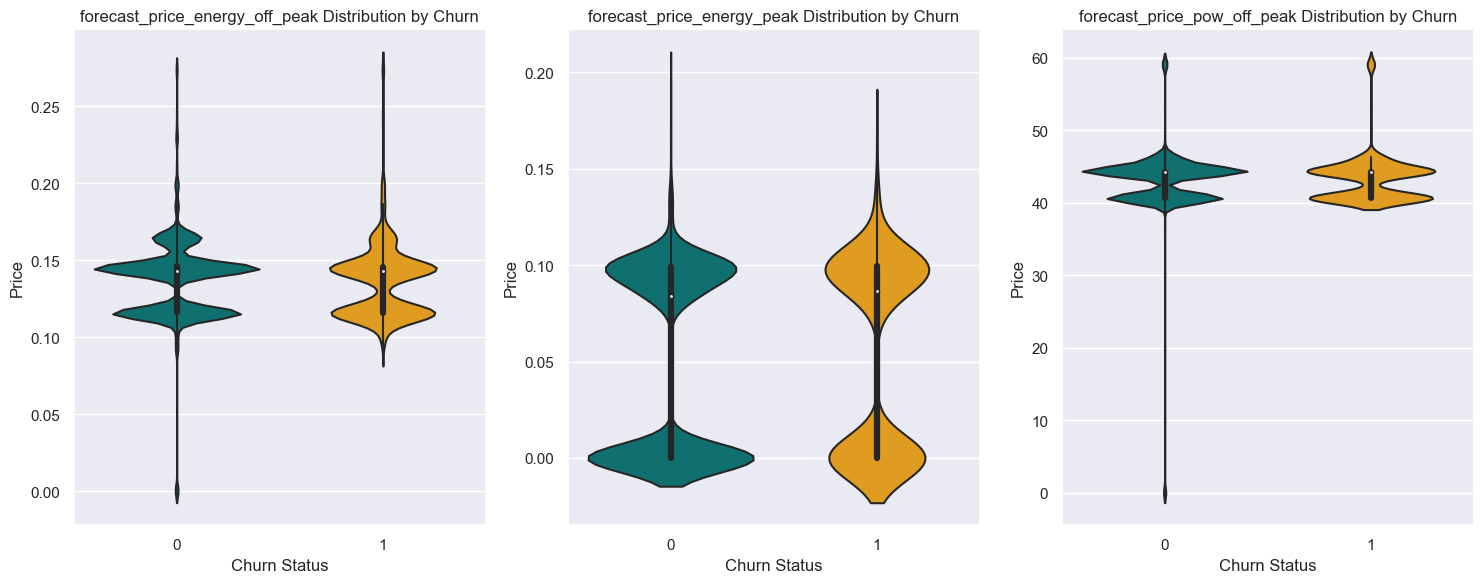

In [117]:
plt.figure(figsize=(15, 6))
for i, col in enumerate(price_cols, 1):
    plt.subplot(1, 3, i)
    sns.violinplot(x='churn', y=col, data=client_df, palette=['teal', 'orange'], split=True,alpha=0.7)
    plt.title(f'{col} Distribution by Churn', fontsize=12)
    plt.xlabel("Churn Status")
    plt.ylabel("Price")
    plt.tight_layout()
plt.show()

- Consistency in Prices: Across all three plots, the forecast prices for both churn and non-churn customers are quite similar, suggesting that pricing might not be the primary factor influencing churn.

- Slight Variations: The non-churn customers show a slightly wider distribution in prices for off-peak energy and power, indicating a bit more variability in their forecast prices compared to churn customers.

### Correlations between price variables and churn
Check for correlations between these price variables and churn.

                                forecast_price_energy_off_peak  \
forecast_price_energy_off_peak                        1.000000   
forecast_price_energy_peak                           -0.330138   
forecast_price_pow_off_peak                           0.630377   
churn                                                -0.010837   

                                forecast_price_energy_peak  \
forecast_price_energy_off_peak                   -0.330138   
forecast_price_energy_peak                        1.000000   
forecast_price_pow_off_peak                      -0.242017   
churn                                             0.029315   

                                forecast_price_pow_off_peak     churn  
forecast_price_energy_off_peak                     0.630377 -0.010837  
forecast_price_energy_peak                        -0.242017  0.029315  
forecast_price_pow_off_peak                        1.000000  0.014778  
churn                                              0.014778  1.000000 

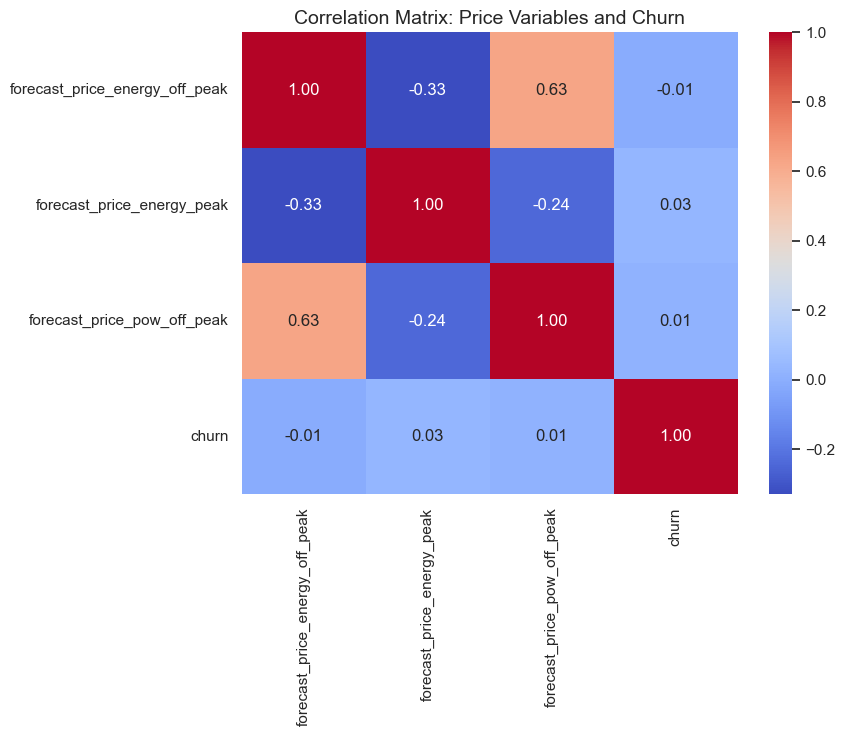

In [30]:
# Calculate correlations
correlation = client_df[['forecast_price_energy_off_peak', 
                         'forecast_price_energy_peak', 
                         'forecast_price_pow_off_peak', 
                         'churn']].corr()

print(correlation)

# Heatmap of correlations
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix: Price Variables and Churn", fontsize=14)
plt.show()


- There is a strong positive correlation (0.63) between forecast_price_energy_off_peak and forecast_price_pow_off_peak, indicating that as off-peak energy prices increase, off-peak power prices tend to increase as well.
- There is a moderate negative correlation between forecast_price_energy_off_peak and forecast_price_energy_peak (-0.33), and between forecast_price_energy_peak and forecast_price_pow_off_peak (-0.24). This suggests that higher off-peak energy prices are associated with lower peak energy prices and vice versa.
- The churn variable shows very weak correlations with all the price variables, ranging from -0.01 to 0.03. This indicates that these specific price variables do not have a significant impact on customer churn.
- The correlation matrix indicates strong relationships between different price variables, particularly between off-peak energy and power prices.
- The very weak correlations between price variables and churn suggest that other factors might be more influential in determining customer churn.

### Analyze trends in dynamic prices over time
Use `price_df` to analyze trends in `price_off_peak_var`, `price_peak_var`, and `price_mid_peak_var` over time and identify spikes or inconsistencies in prices and correlate them with churn rates.

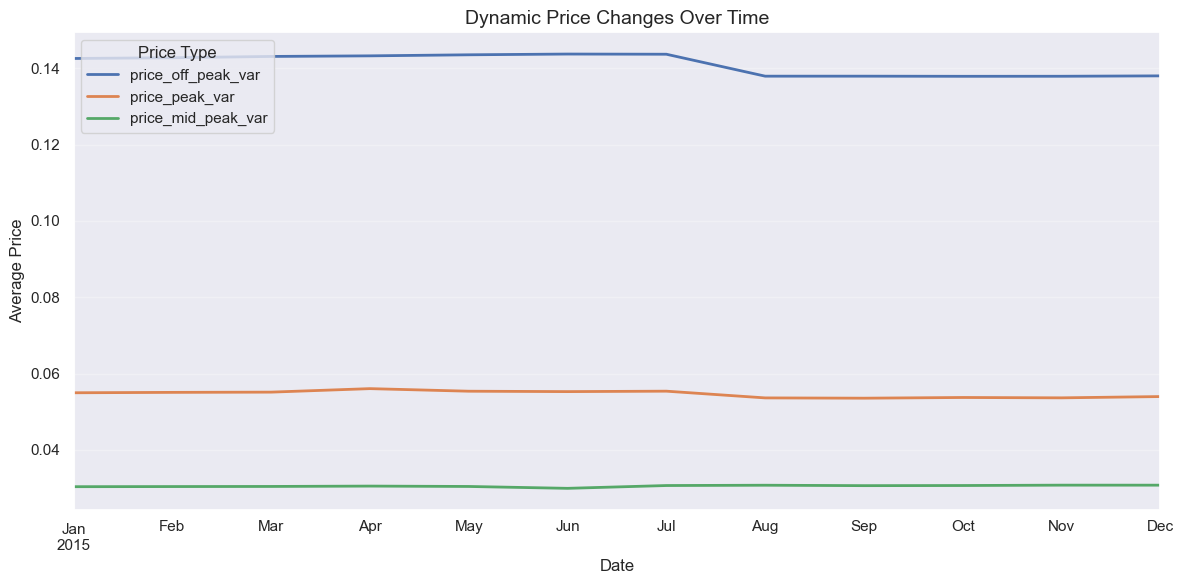

In [131]:
price_df['price_date'] = pd.to_datetime(price_df['price_date'])

price_trends = price_df.groupby('price_date')[['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var']].mean()

plt.figure(figsize=(12, 6))
price_trends.plot(ax=plt.gca(), linewidth=2)
plt.title("Dynamic Price Changes Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.legend(title="Price Type", loc="upper left")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [130]:
price_trends

,price_off_peak_var,price_peak_var,price_mid_peak_var
price_date,,,
2015-01-01,0.142568,0.054950,0.030333
2015-02-01,0.142767,0.055053,0.030367
2015-03-01,0.143104,0.055118,0.030396
2015-04-01,0.143259,0.056035,0.030492
2015-05-01,0.143534,0.055359,0.030393
2015-06-01,0.143731,0.055255,0.029902
2015-07-01,0.143683,0.055369,0.030636
2015-08-01,0.137933,0.053605,0.030717
2015-09-01,0.137933,0.053532,0.030606


In [141]:
price_df['price_date'] = pd.to_datetime(price_df['price_date'], format='%d-%m-%Y')

# Extract month for aggregation
price_df['month'] = price_df['price_date'].dt.month_name()

# Merge DataFrames on 'id'
merged_df = pd.merge(price_df, client_df, on='id', how='inner')
print(merged_df.columns)


Index(['id', 'price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix', 'month', 'channel_sales', 'cons_12m',
       'cons_gas_12m', 'cons_last_month', 'date_activ', 'date_end',
       'date_modif_prod', 'date_renewal', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn',
       'activation_month', 'activation_year', 'consumption_category',
       'forecast_error', 'profitability_segment', 'tenure_years',
       'days_to_renewal', 'near_renewal', 'price_sensitivity'],
      dtype='object')


In [142]:
grouped_df = merged_df.groupby(['month', 'churn'])[
    ['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var']
].mean().reset_index()

# Display the grouped dataframe
print(grouped_df)

        month  churn  price_off_peak_var  price_peak_var  price_mid_peak_var
0       April      0            0.144519        0.052942            0.027703
1       April      1            0.144158        0.058077            0.033339
2      August      0            0.139324        0.050633            0.027931
3      August      1            0.138646        0.055488            0.033702
4    December      0            0.139433        0.050982            0.028015
5    December      1            0.138810        0.055948            0.033651
6    February      0            0.144204        0.051916            0.027553
7    February      1            0.143662        0.056931            0.033224
8     January      0            0.144004        0.051809            0.027535
9     January      1            0.143417        0.056989            0.033213
10       July      0            0.144959        0.052299            0.027852
11       July      1            0.144834        0.057206            0.033464

### Visualize Price Trends by Churn Status

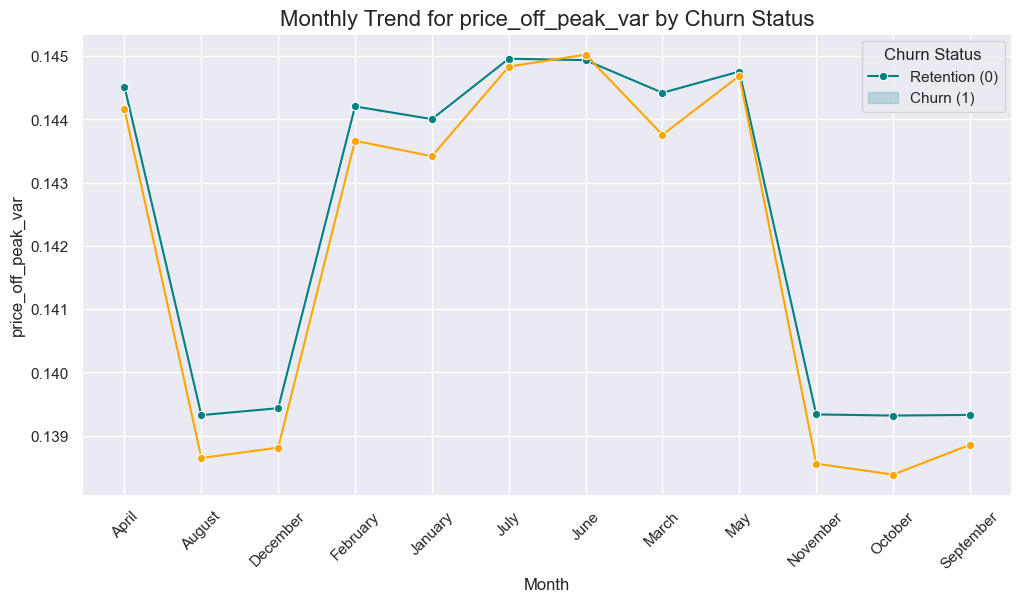

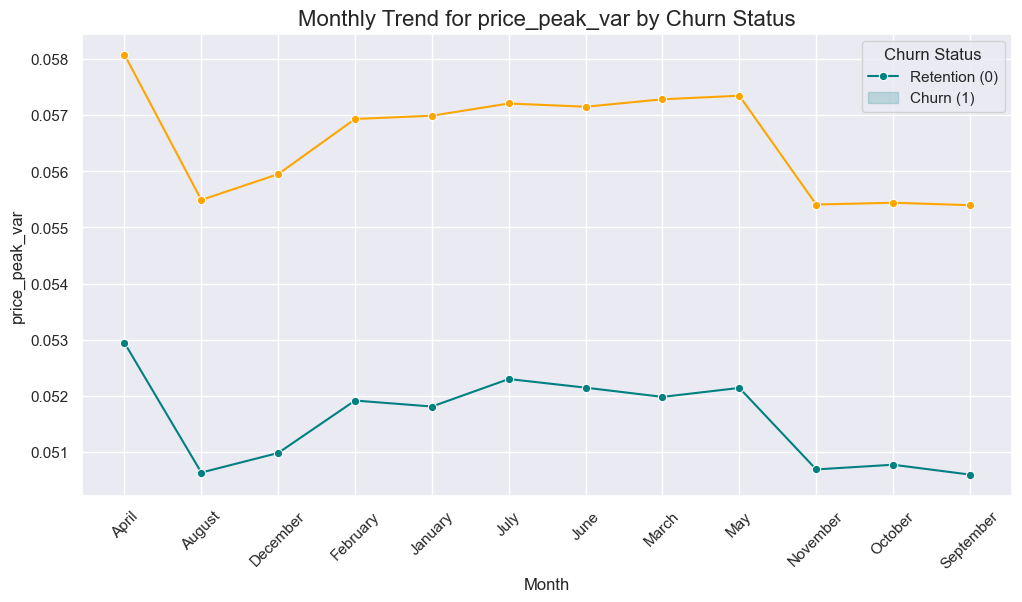

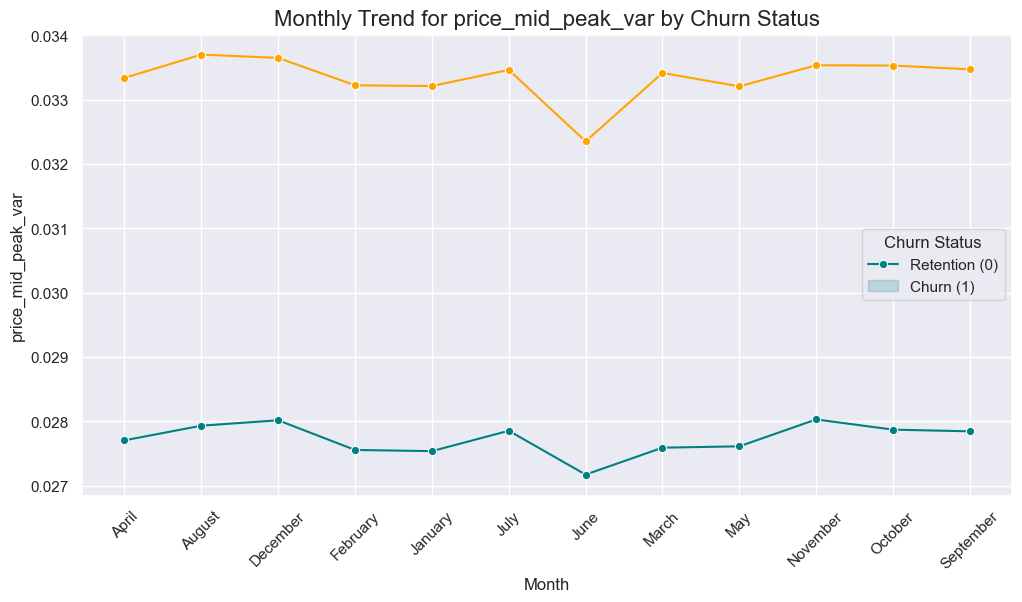

In [144]:

month_order = [
    "January", "February", "March", "April", "May", "June", 
    "July", "August", "September", "October", "November", "December"
]

# List of measures to plot
measures = ['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var']


for measure in measures:
    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=grouped_df,
        x='month',
        y=measure,
        hue='churn',
        palette=['teal', 'orange'],
        hue_order=[0, 1],
        marker='o',
        linestyle='-'
    )
    plt.title(f"Monthly Trend for {measure} by Churn Status", fontsize=16)
    plt.xlabel("Month", fontsize=12)
    plt.ylabel(measure, fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title='Churn Status', labels=['Retention (0)', 'Churn (1)'])
    plt.grid(True)
    plt.show()


- The "Churn (1)" group shows significant sensitivity to changes in off-peak and mid-peak pricing.
- Sharp drops in "price_off_peak_var" and "price_mid_peak_var" are observed in February and May for this group.
- Fluctuations in pricing for both groups may be influenced by seasonal factors.
- Increased usage or demand in certain months could lead to adjustments in pricing.
- The sharp drops in pricing during February and May could act as potential churn triggers.
- Price changes in these months seem to negatively impact customer retention for the "Churn (1)" group.


# Analysing Consumption
### Electricity consumption for churned vs retained customers
Here we compare `cons_12m`, `cons_last_month`, and `forecast_cons_12m` for churned and retained customers.


            cons_12m  cons_last_month  forecast_cons_12m
churn                                                   
0      167867.266550     17046.352089        1858.473333
1       78862.478506      7205.239605        1962.861938


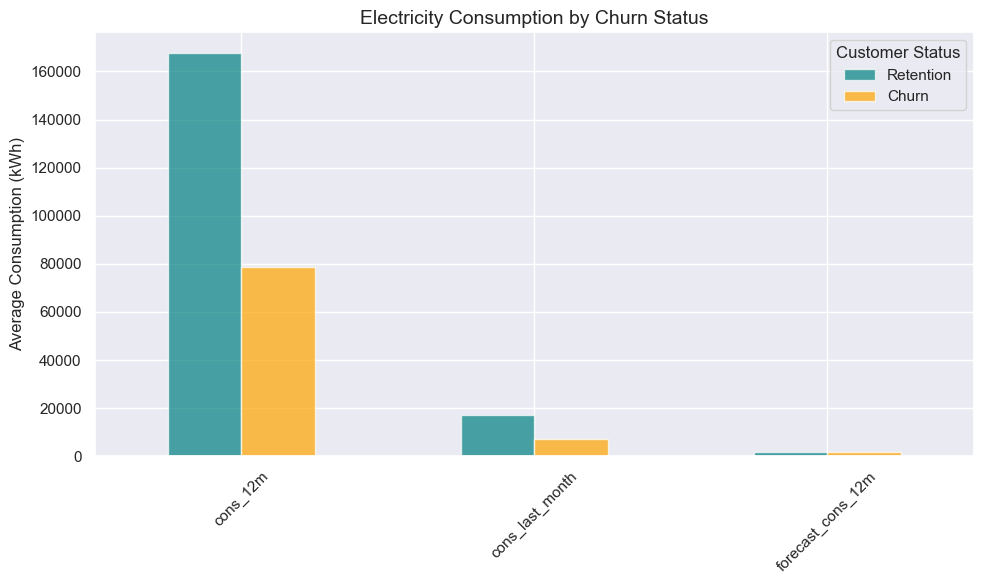

In [41]:
# Calculate average consumption by churn status
electricity_comparison = client_df.groupby('churn')[['cons_12m', 'cons_last_month', 'forecast_cons_12m']].mean()

print(electricity_comparison)

electricity_comparison.T.plot(kind='bar', figsize=(10, 6), color=['teal', 'orange'], alpha=0.7)
plt.title("Electricity Consumption by Churn Status", fontsize=14)
plt.ylabel("Average Consumption (kWh)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(["Retention", "Churn"], title="Customer Status")
plt.tight_layout()
plt.show()


- **12-Month Consumption**:  
  - Retention customers: Average consumption of over 160,000 kWh.  
  - Churn customers: Average consumption of around 80,000 kWh.

- **Last Month's Consumption**:  
  - Retention customers: Average consumption of about 20,000 kWh.  
  - Churn customers: Average consumption of about 5,000 kWh.

- **Forecasted 12-Month Consumption**:  
  - Both groups show low forecasted consumption.  
  - Retention customers have slightly higher forecasted consumption than churn customers.

- **Key Insight**:  
  - Retention customers consistently consume more electricity across all periods than churn customers.  
  - These consumption differences provide insights into customer behavior and could guide strategies to reduce churn and improve retention.

### Monthly variations in electricity consumption
Explore seasonal or monthly variations in consumption.

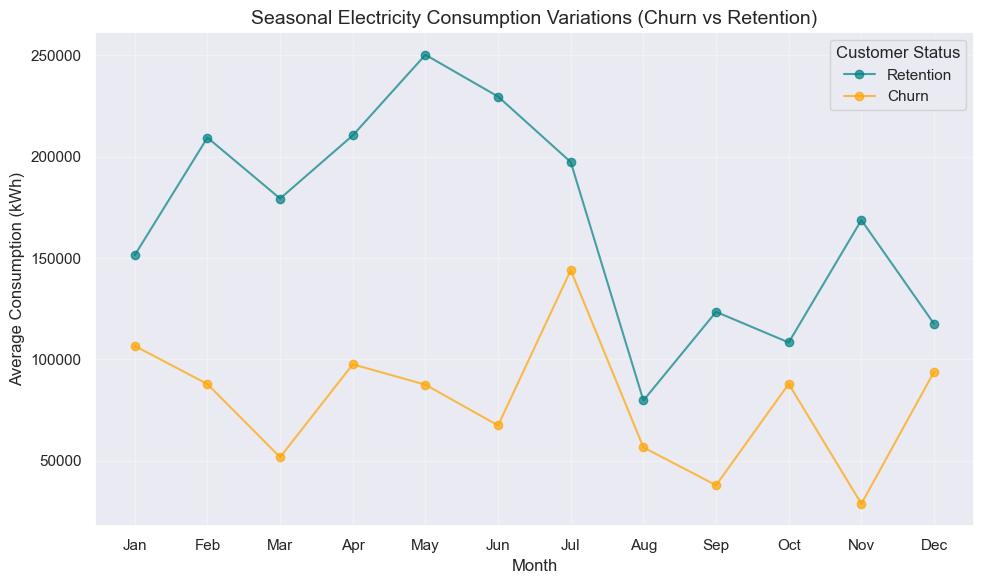

In [52]:
# Group by month and churn to analyze average monthly consumption for churned and retained customers
monthly_consumption_churn = client_df.groupby(['activation_month', 'churn'])['cons_12m'].mean().unstack()

plt.figure(figsize=(10, 6))

# Plot churned and retained customers
plt.plot(monthly_consumption_churn.index, monthly_consumption_churn[0], marker='o', label='Retention', color='teal', alpha=0.7)
plt.plot(monthly_consumption_churn.index, monthly_consumption_churn[1], marker='o', label='Churn', color='orange', alpha=0.7)

plt.title("Seasonal Electricity Consumption Variations (Churn vs Retention)", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Consumption (kWh)", fontsize=12)
plt.grid(alpha=0.3)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title="Customer Status")
plt.tight_layout()

# Show plot
plt.show()


- Retained customers' electricity usage peaks in July, suggesting higher demand during summer months, possibly due to increased air conditioning use.
- The more variable consumption among churned customers could indicate less predictable usage patterns, potentially making retention efforts more challenging.
- Understanding these patterns can help the company identify critical times to engage with customers and develop tailored strategies to improve retention.

### Gas consumption and churn patterns
Analyze `cons_gas_12m` to see if gas clients have distinct churn patterns.


churn
0    30121.497308
1     9235.411557
Name: cons_gas_12m, dtype: float64


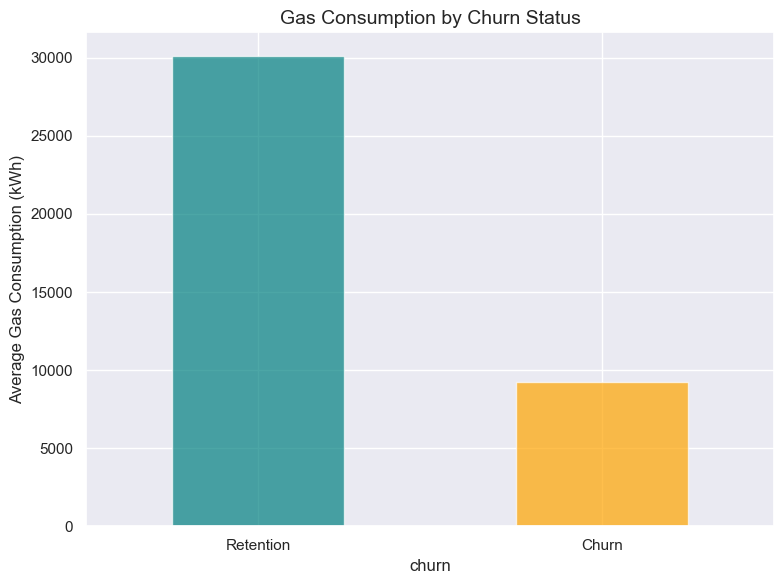

In [65]:
# Calculate average gas consumption by churn status
gas_comparison = client_df.groupby('churn')['cons_gas_12m'].mean()

print(gas_comparison)

gas_comparison.plot(kind='bar', figsize=(8, 6), color=['teal', 'orange'], alpha=0.7)
plt.title("Gas Consumption by Churn Status", fontsize=14)
plt.ylabel("Average Gas Consumption (kWh)", fontsize=12)
plt.xticks([0, 1], ['Retention', 'Churn'], rotation=0)
plt.tight_layout()
plt.show()


###  Forecast vs Actual electricity consumption
Compare `forecast_cons_12m` with `cons_12m` to evaluate forecasting accuracy and its potential impact on churn.

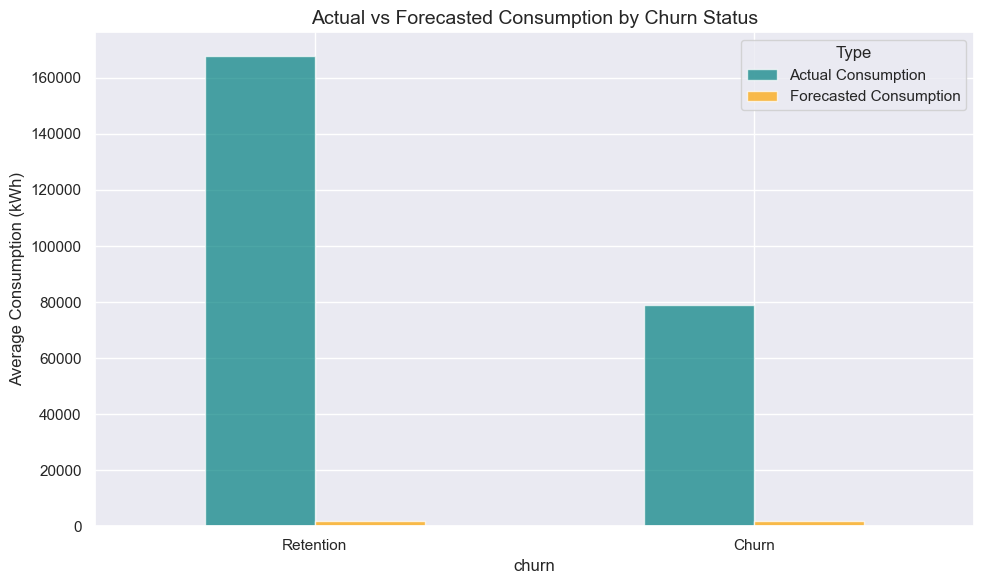

In [67]:
# Group by churn to calculate average actual and forecasted consumption
consumption_comparison = client_df.groupby('churn')[['cons_12m', 'forecast_cons_12m']].mean()

# Visualization: Bar plot for actual vs forecasted consumption
consumption_comparison.plot(kind='bar', figsize=(10, 6), color=['teal', 'orange'], alpha=0.7)
plt.title("Actual vs Forecasted Consumption by Churn Status", fontsize=14)
plt.ylabel("Average Consumption (kWh)", fontsize=12)
plt.xticks([0, 1], ['Retention', 'Churn'], rotation=0)
plt.legend(['Actual Consumption', 'Forecasted Consumption'], title="Type")
plt.tight_layout()
plt.show()


- The significant difference in actual consumption indicates that retained customers use more electricity than those who churn. This could be due to various factors such as higher energy needs, larger households, or more extensive use of electrical appliances.

- The very low forecasted consumption for both categories might suggest that the forecasting model is either very conservative or there might be an issue with how the forecast was generated. This discrepancy needs to be investigated further to ensure accurate predictions and effective planning.

churn
0   -166008.793218
1    -76899.616568
Name: forecast_error, dtype: float64


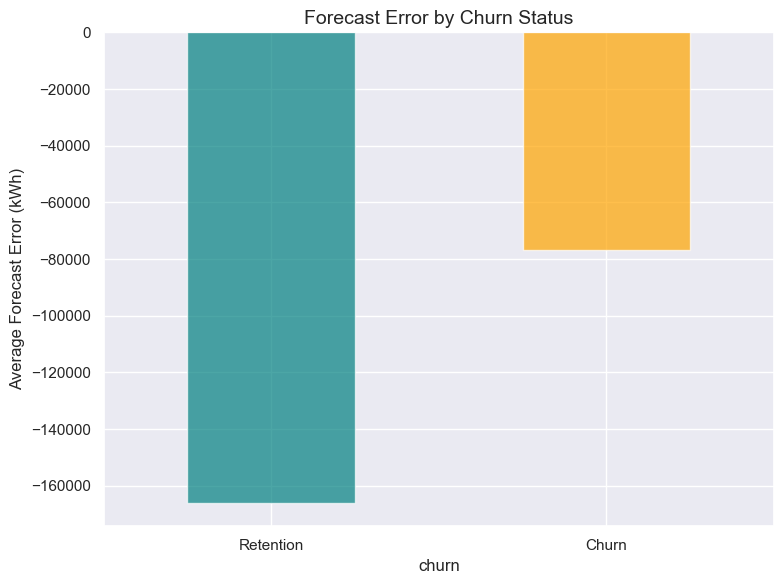

In [68]:
# Calculate the difference between forecast and actual consumption
client_df['forecast_error'] = client_df['forecast_cons_12m'] - client_df['cons_12m']

# Compare forecast errors for churned vs retained customers
forecast_comparison = client_df.groupby('churn')['forecast_error'].mean()

print(forecast_comparison)

forecast_comparison.plot(kind='bar', figsize=(8, 6), color=['teal', 'orange'], alpha=0.7)
plt.title("Forecast Error by Churn Status", fontsize=14)
plt.ylabel("Average Forecast Error (kWh)", fontsize=12)
plt.xticks([0, 1], ['Retention', 'Churn'], rotation=0)
plt.tight_layout()
plt.show()




---

## Analysing Profits
### Profitability metrics analysis
 Analyze `margin_gross_pow_ele`, `margin_net_pow_ele`, and `net_margin` for churned versus retained customers using kde plots

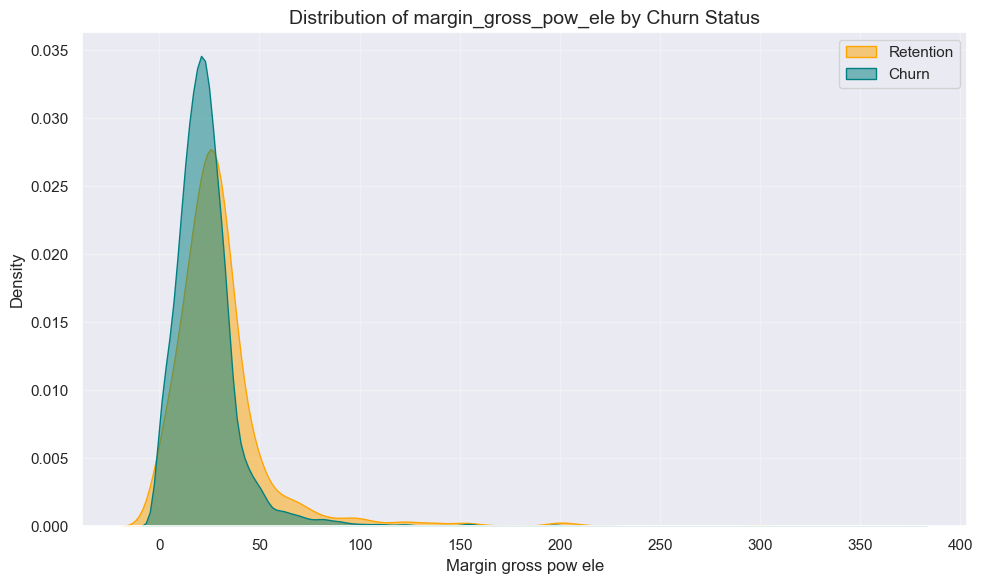

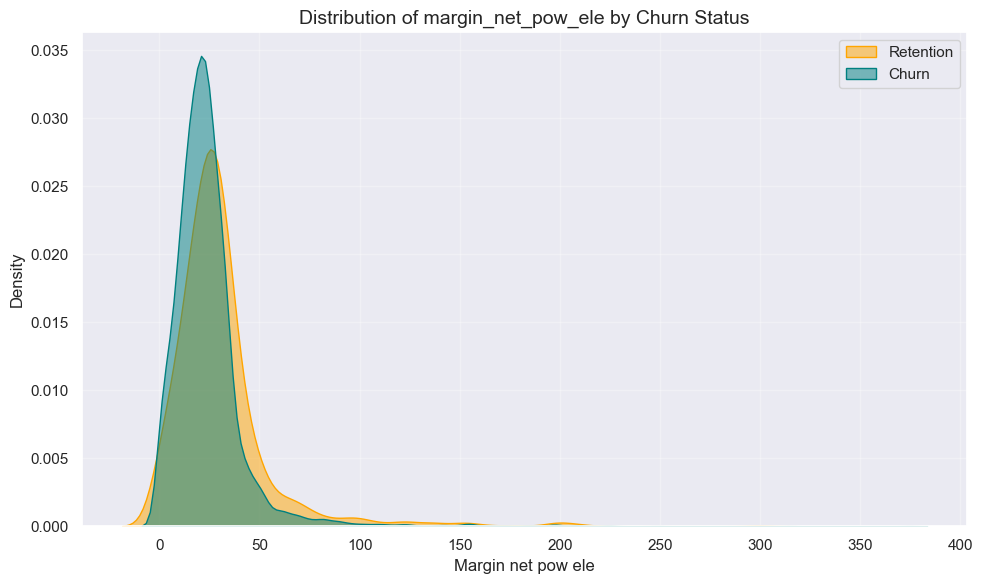

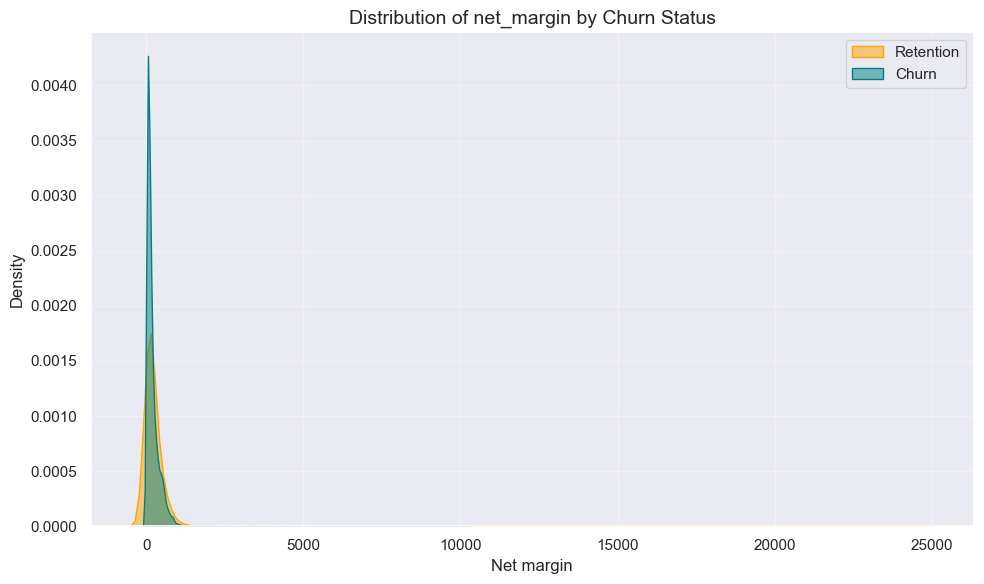

In [69]:
# Profitability metrics analysis
profitability_metrics = ['margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin']

for metric in profitability_metrics:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=client_df, x=metric, hue='churn', fill=True, common_norm=False, palette=['teal', 'orange'], alpha=0.5)
    plt.title(f"Distribution of {metric} by Churn Status", fontsize=14)
    plt.xlabel(metric.replace('_', ' ').capitalize(), fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.legend(['Retention', 'Churn'])
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


- All three plots show right-skewed distributions, meaning the majority of the margin values (gross, net power, and net) are concentrated at lower levels for both retained and churned customers.
- In all three metrics (gross, net power, and net), retained customers tend to have lower margins. The density curves for Retention are higher at lower margin values, indicating a larger concentration of retained customers with lower margins.
- Although there is a slight increase in density for churned customers at higher margins, it remains relatively low compared to retained customers. This indicates that higher margins do not significantly correlate with increased churn rates.
- Lower margins (whether gross, net power, or net) are not driving factors for customer churn. In fact, customers who stay with the company tend to have lower margins.
- Higher margins do not show a strong relationship with customer churn. Churned customers have a relatively low density even at higher margin values.

## Churn by profitability segmentation
Segment customers into low, medium, and high profitability based on net_margin


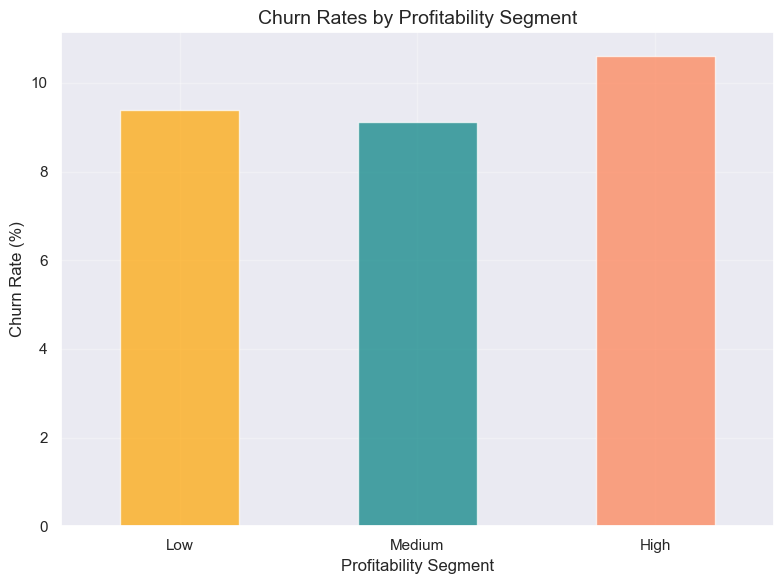

In [70]:
profitability_bins = [-np.inf, client_df['net_margin'].quantile(0.33), client_df['net_margin'].quantile(0.66), np.inf]
profitability_labels = ['Low', 'Medium', 'High']
client_df['profitability_segment'] = pd.cut(client_df['net_margin'], bins=profitability_bins, labels=profitability_labels)
# Churn rates by profitability segment
profitability_churn = client_df.groupby('profitability_segment')['churn'].mean() * 100

# Visualization: Bar plot of churn rates by profitability segment
plt.figure(figsize=(8, 6))
profitability_churn.plot(kind='bar', color=['orange', 'teal', 'coral'], alpha=0.7)
plt.title("Churn Rates by Profitability Segment", fontsize=14)
plt.ylabel("Churn Rate (%)", fontsize=12)
plt.xlabel("Profitability Segment", fontsize=12)
plt.xticks(rotation=0)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


---
## Contract and Engagement Analysis
### Customer Tenure Distribution by Churn 
 Explore `date_activ`, `date_end`, `date_modif_prod`, and `date_renewal` to understand customer tenure and renewal behaviors and Investigate if customers with shorter contracts or those nearing renewal are more likely to churn.

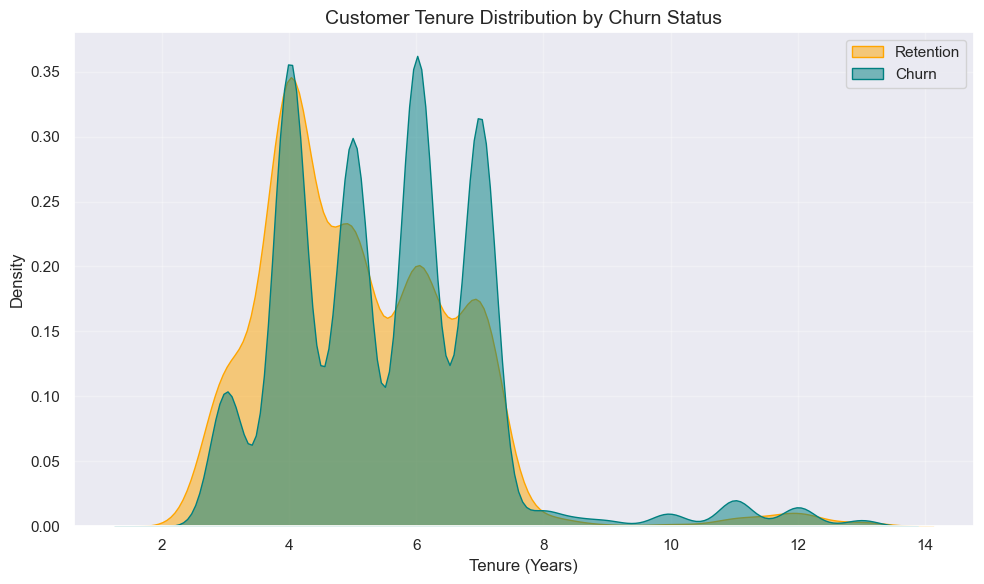

In [74]:

date_columns = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']
for col in date_columns:
    client_df[col] = pd.to_datetime(client_df[col])

# Calculate customer tenure (in years) using activation and end dates
client_df['tenure_years'] = (client_df['date_end'] - client_df['date_activ']).dt.days / 365

# Tenure analysis
plt.figure(figsize=(10, 6))
sns.kdeplot(data=client_df, x='tenure_years', hue='churn', fill=True, common_norm=False, palette=['teal', 'orange'], alpha=0.5)
plt.title("Customer Tenure Distribution by Churn Status", fontsize=14)
plt.xlabel("Tenure (Years)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(['Retention', 'Churn'])
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


- There is a significant density of churn within the first 4 years of tenure. This indicates that many customers tend to leave within this period, suggesting that the initial years are critical for customer retention efforts.
- The retention density shows peaks around 2, 4, and 6 years. This suggests that customers who stay beyond these points are more likely to continue their tenure with the company.
- After around 8 years, the density for both churn and retention decreases significantly. This indicates fewer customers in this tenure range, which could mean that long-term customers have a lower likelihood of leaving.

### Customer Antiquity Distribution by Churn

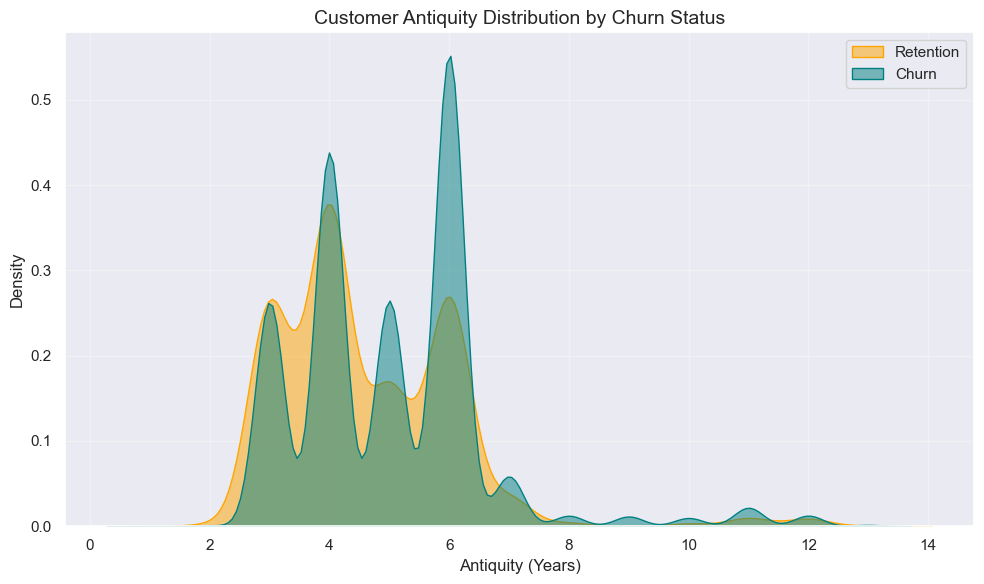

In [75]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=client_df, x='num_years_antig', hue='churn', fill=True, common_norm=False, palette=['teal', 'orange'], alpha=0.5)
plt.title("Customer Antiquity Distribution by Churn Status", fontsize=14)
plt.xlabel("Antiquity (Years)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(['Retention', 'Churn'])
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

---
## Product and Service Analysis
###  Avg Number of active products for churned vs retained customers

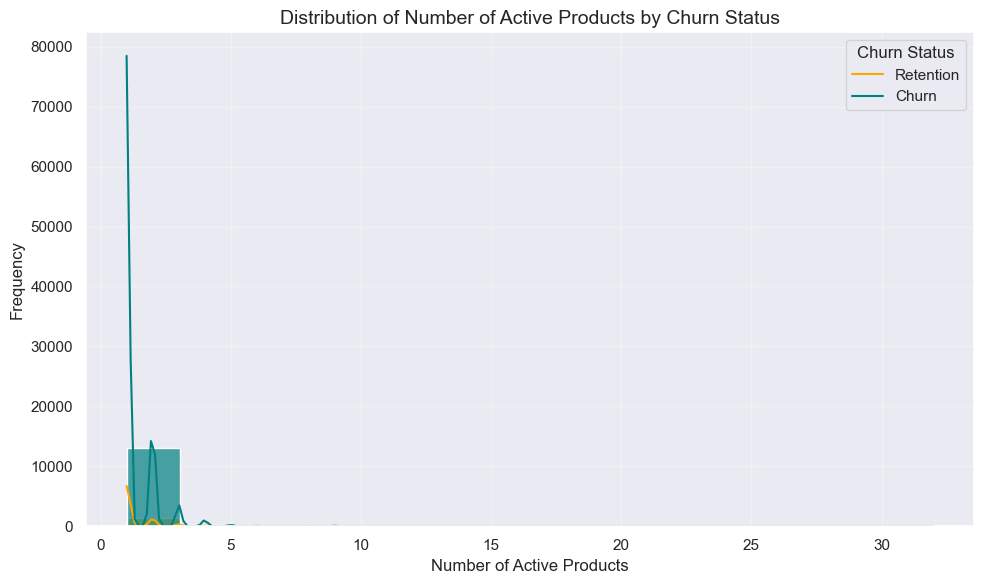

In [82]:
plt.figure(figsize=(10, 6))
sns.histplot(data=client_df, x='nb_prod_act', hue='churn', kde=True, palette=['teal', 'orange'], bins=15, alpha=0.7)

plt.title("Distribution of Number of Active Products by Churn Status", fontsize=14)
plt.xlabel("Number of Active Products", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(title='Churn Status', labels=['Retention', 'Churn'])
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

- Both retention and churn densities are highest at lower numbers of active products, particularly around 0 to 2 active products. This indicates that most customers, regardless of their churn status, have a low number of active products.
- There is a long tail extending towards higher numbers of active products, but the density is very low in these regions. This implies that very few customers have a high number of active products.
- There are slight differences in the density peaks for retention and churn, with churn showing a slightly higher density at 0 active products compared to retention. This might suggest that customers with no active products are more likely to churn.

### KDE plot for nb_prod_act by churn status

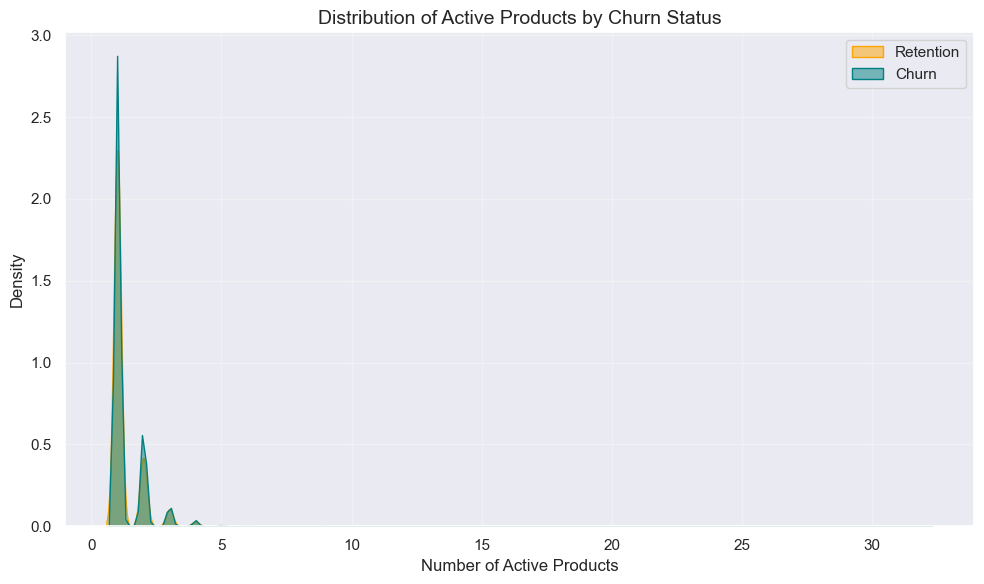

In [80]:

plt.figure(figsize=(10, 6))
sns.kdeplot(data=client_df, x='nb_prod_act', hue='churn', fill=True, common_norm=False, palette=['teal', 'orange'], alpha=0.5)
plt.title("Distribution of Active Products by Churn Status", fontsize=14)
plt.xlabel("Number of Active Products", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(['Retention', 'Churn'])
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Price and Consumption
Here we will try to check if customers with higher sensitivity to price are more likely to churn.


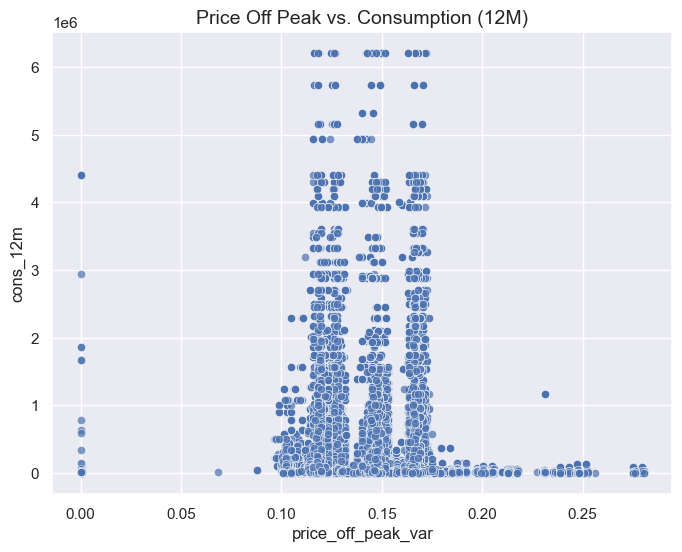

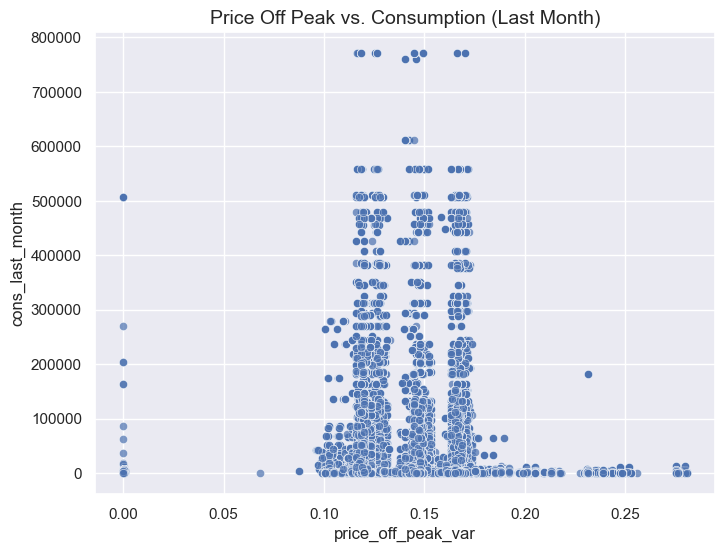

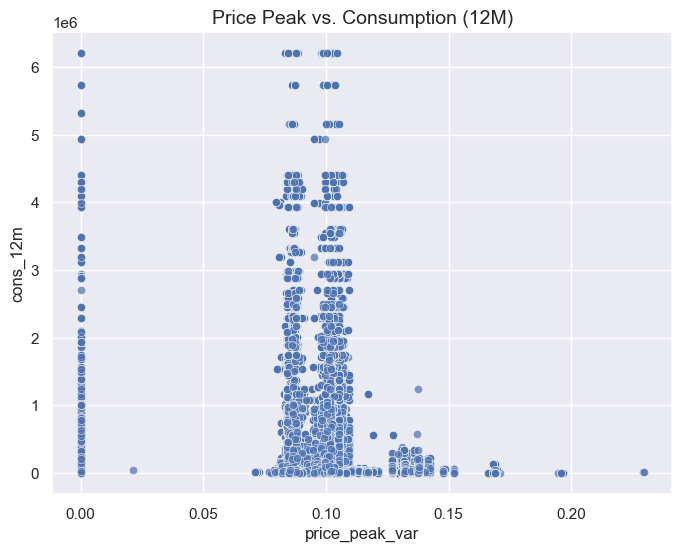

In [148]:
# Scatter Plots
def plot_scatter(data, x_col, y_col, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=x_col, y=y_col, alpha=0.7)
    plt.title(title, fontsize=14)
    plt.xlabel(x_col, fontsize=12)
    plt.ylabel(y_col, fontsize=12)
    plt.grid(True)
    plt.show()

# Scatter Plot 1: price_off_peak_var vs. cons_12m
plot_scatter(merged_df, 'price_off_peak_var', 'cons_12m', 'Price Off Peak vs. Consumption (12M)')

# Scatter Plot 2: price_off_peak_var vs. cons_last_month
plot_scatter(merged_df, 'price_off_peak_var', 'cons_last_month', 'Price Off Peak vs. Consumption (Last Month)')

# Scatter Plot 3: price_peak_var vs. cons_12m
plot_scatter(merged_df, 'price_peak_var', 'cons_12m', 'Price Peak vs. Consumption (12M)')


merged_df['price_date'] = pd.to_datetime(merged_df['price_date'])


merged_df = merged_df.sort_values(by='price_date')



- Across all three plots, customers with similar price sensitivities exhibit diverse consumption patterns, indicating that price sensitivity alone may not be a strong predictor of consumption behavior.
- The similar clustering of data points in terms of price sensitivity suggests that most customers have comparable sensitivity to price changes, both during peak and off-peak periods.
- While there is noticeable clustering around certain levels of price sensitivity, it is not immediately clear if this directly correlates with higher or lower consumption and churn

## Correlation
### Generate a correlation matrix to understand relationships between numerical features

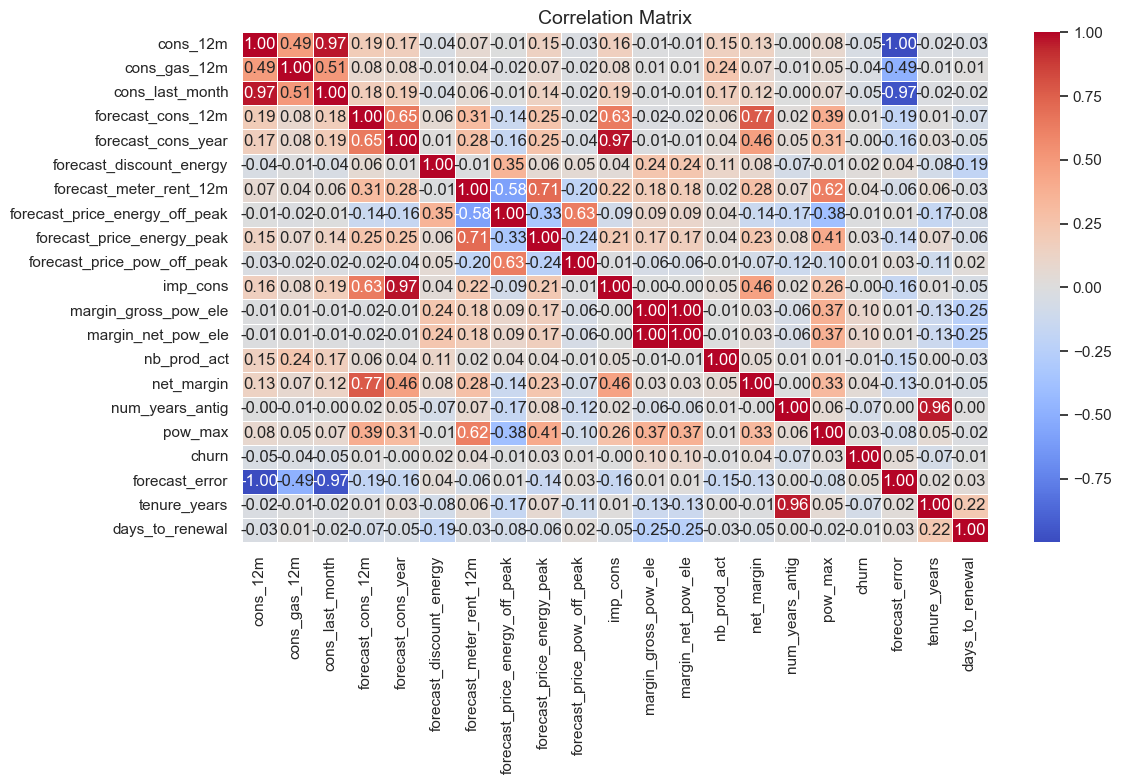

In [101]:
# Select only numerical columns for correlation analysis
numerical_cols = client_df.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation matrix
corr_matrix = client_df[numerical_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation Matrix", fontsize=14)
plt.tight_layout()
plt.show()


- cons_12m and cons_last_month (0.97): Past 12-month consumption strongly correlates with the last month's consumption.
- forecast_cons_12m and forecast_cons_year (0.65): Moderate positive correlation between forecasted 12-month and yearly consumption.
- forecast_price_energy_peak and forecast_price_pow_off_peak (0.71): Forecasted peak and off-peak energy prices are closely related.
- forecast_error and cons_12m (1.00): Perfect correlation, indicating potential issues with the forecast model.
- tenure_years and days_to_renewal (0.96): High correlation between customer tenure and days remaining until renewal.
- forecast_price_energy_off_peak and forecast_discount_energy (-0.58): Higher off-peak energy prices are linked to lower energy discounts.
- forecast_price_energy_off_peak and forecast_meter_rent_12m (-0.38): Moderate negative correlation between off-peak prices and meter rent costs.
- forecast_error: Perfectly correlates with cons_12m, cons_last_month, and forecast_cons_12m, suggesting a flaw in forecasting methods.
- forecast_price_energy_peak: Strong correlation with forecast_price_pow_off_peak, indicating a consistent pricing strategy.
- tenure_years and days_to_renewal: Longer customer tenure correlates with more days remaining until renewal.

### Logistic Regression to understand each features influence on churn
Logistic regression helps analyze the influence of features on churn by modeling the probability of churn (1 = churned, 0 = not churned) based on numerical predictors. It estimates feature importance using coefficients, with larger absolute values indicating stronger impact. By standardizing features, training the model, and visualizing feature importance through a bar plot, we can identify key drivers of churn and prioritize actionable strategies to improve customer retention. This approach provides insights into which variables most significantly affect churn probability, enabling data-driven decisions to reduce churn effectively.

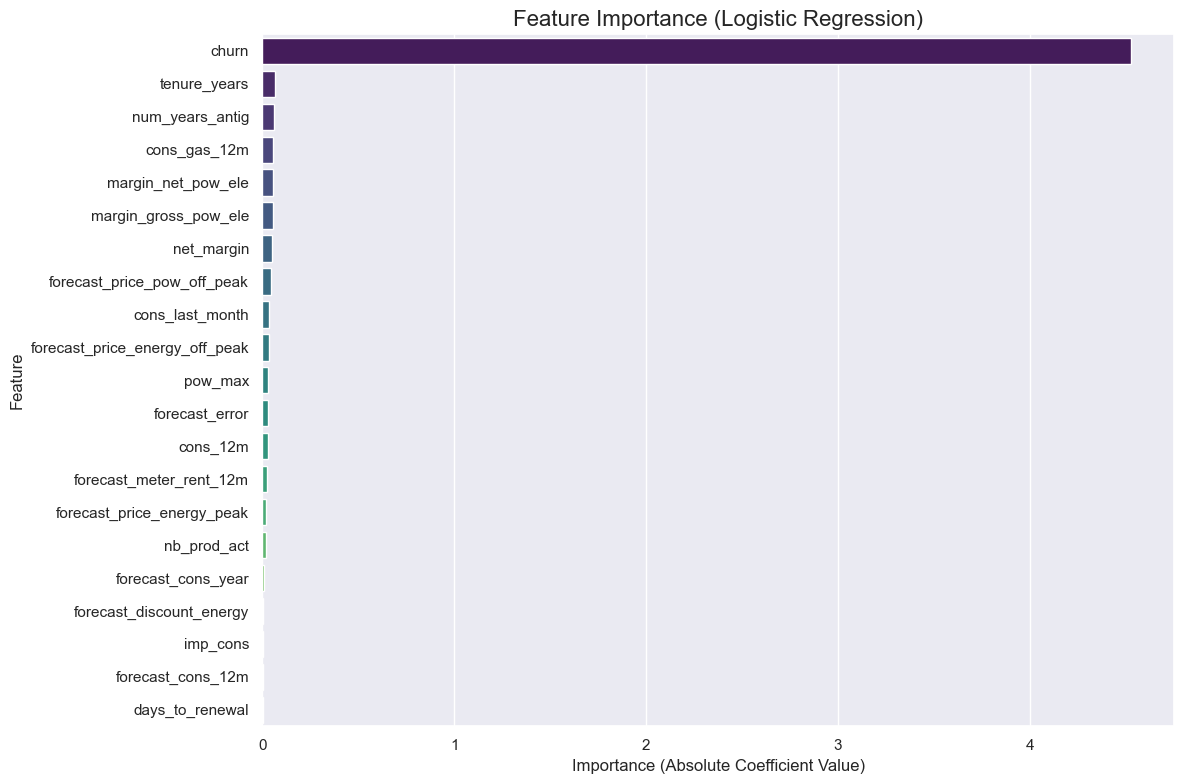

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select all numerical columns
features = client_df.select_dtypes(include=['float64', 'int64']).columns

# Define your target variable (churn)
X = client_df[features]
y = client_df['churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit a Logistic Regression model
logreg = LogisticRegression(max_iter=1000)  # Set max_iter to ensure convergence if needed
logreg.fit(X_train_scaled, y_train)

# Get feature importance (coefficients)
feature_importance_logreg = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(logreg.coef_[0])  # Absolute value of coefficients
}).sort_values(by='Importance', ascending=False)

# Plot the feature importance for logistic regression
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_logreg, palette='viridis')
plt.title("Feature Importance (Logistic Regression)", fontsize=16)
plt.xlabel("Importance (Absolute Coefficient Value)", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()


- Tenure_Years and Num_Years_Antig: Longer customer tenure strongly reduces churn risk.
- Cons_Gas_12m: Higher gas consumption correlates with lower churn.
- Margin_Net_Pow_Ele and Margin_Gross_Pow_Ele: Profitability from electricity usage impacts retention.
<br>

- Forecast_Price_Pow_Off_Peak and Forecast_Price_Energy_Off_Peak: Off-peak pricing significantly affects churn.
- Cons_Last_Month: Recent electricity usage is moderately relevant.
- Pow_Max and Forecast_Error: Maximum power usage and forecasting accuracy also play a role.
<br>

- Cons_12m and Forecast_Meter_Rent_12m: Past consumption and meter rent have a smaller impact.
- Forecast_Price_Energy_Peak: Peak pricing has limited influence.
- Forecast_Discount_Energy and Days_to_Renewal: Discounts and contract renewal periods contribute minimally.

---

# Over all insights

- Tenure and Antiquity: Longer-tenured customers (higher Tenure_Years and Num_Years_Antig) show significantly lower churn rates, highlighting the importance of customer loyalty.

**Consumption Behavior**
- Higher Cons_Gas_12m and Cons_Last_Month are associated with lower churn, indicating that high-consumption customers are more likely to stay.
- Seasonal and monthly variations in electricity usage can also impact retention.
<br>

**Price Sensitivity**
- Off-peak pricing (Forecast_Price_Pow_Off_Peak, Forecast_Price_Energy_Off_Peak) strongly influences churn, while peak pricing (Forecast_Price_Energy_Peak) has a smaller impact.
- Customers with similar price sensitivities show diverse consumption patterns, indicating price alone may not fully explain churn behavior.
<br>

**Profit Margins**
- Higher profitability metrics (Margin_Net_Pow_Ele, Margin_Gross_Pow_Ele) are linked to lower churn rates, making profit margins an important factor in retention.
<br>

**Contract and Renewal** 
- Shorter contracts and customers approaching renewal (Days_to_Renewal) are more likely to churn, underscoring the need for proactive engagement before renewal periods.
<br>

**Product and Engagement**
- Customers with multiple active products (Nb_Prod_Act) and those using both gas and electricity services (Has_Gas) tend to churn less, suggesting cross-product engagement boosts retention.
<br>

**Channel and Campaign**

- Sales channels and first campaigns (Channel_Sales, Origin_Up) impact churn rates, highlighting the effectiveness of certain channels and campaigns in retaining customers.
<br>

**Correlation Insights**
- Strong correlations exist between tenure, consumption, and churn, while features like discounts and forecast errors show minimal impact.